## Try joining the data to be able to examine the amount of money flowing to each of the different problem areas

Later, I can try to join the data and look at some other interesting questions like - 

I only care about the investors if I want to see specifically which areas investors are investing in.  But it seems like there are too many investors, so the data gets too granular.  But let's try it anyway and see what it looks like

**Questions:**
- How much money is flowing to companies utilizing AI?  
- Utilizing analytics? 
- Corporate vs. consumer?  

In [21]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
path = '../data/interim/funding_investor.csv'
df_fund = pd.read_csv(path, index_col = 0)

path2 = '../data/interim/datasheet_1.csv'
df_firm = pd.read_csv(path2, index_col = 0)

In [23]:
df_fund.head()

,deal_ id,deal_date,deal_year,firm_name,firm_id,round_total,deal_type,country,city,year_founded,codex_category,firm_age
0,DEAL0001,2000-03-22,2000,LexisNexis,FIRM0002,30000000.0,Venture Capital,USA,New York,1973,Legal Research,27
1,DEAL0002,2002-10-03,2002,Workshare,FIRM0027,4500000.0,Series A,UK,London,1999,Legal Analytics,3
3,DEAL0004,2003-10-01,2003,XMLAW,FIRM0051,150000.0,Seed Fund,USA,Boston,2003,Legal Practice Management,0
5,DEAL0006,2004-06-14,2004,DocuSign,FIRM0045,4600000.0,Series A,USA,San Francisco,2003,Legal Practice Management,1
6,DEAL0007,2004-12-27,2004,Brainspace,FIRM0059,1000000.0,Venture Capital,USA,Texas,2005,Legal Document Automation,0


In [24]:
! ls ../data/interim/datasheet_1.csv

../data/interim/datasheet_1.csv


In [25]:
df_firm.head()

,firm_id,firm_name,codex_category,country,city,year_founded,market,problem_1,problem_2,problem_3,analytics,ai,point_integrated,company_url,other_link,comments
0,FIRM0002,LexisNexis,Legal Research,USA,New York,1973,Corporate,Legal Research,Other Practice Tech,NONE,1,0,Integrated Solution,https://www.lexisnexis.com/en-us/gateway.page,NaN,LexisNexis started out as a legal research com...
1,FIRM0003,Korbitec,Legal Document Automation,South Africa,Cape Town,1976,Corporate,Contracts,Other Practice Tech,NONE,1,0,Integrated Solution,https://www.lexisnexis.co.za/,https://www.linkedin.com/company/korbitec/?ori...,Korbitec was acquired by LexisNexis.
2,FIRM0014,Microsystems,Legal Document Automation,USA,Illinois,1995,Corporate,Contracts,KM,LitTech,1,0,Integrated Solution,https://www.litera.com/products/legal/,https://www.linkedin.com/company/microsystems/,Microsoftsystems became Litera Microsystems in...
3,FIRM0015,WorkProducts,Legal Practice Management,USA,Virginia,1995,Corporate,eDiscovery,Other Practice Tech,NONE,0,0,Point Solution,http://www.workproducts.com/#,https://www.businesswire.com/news/home/2009072...,NaN
4,FIRM0021,LiveOffice,Legal Practice Management,USA,California,1998,Corporate,KM,eDiscovery,NONE,0,0,Point Solution,https://www.crunchbase.com/organization/liveof...,https://www.computerworld.com/article/2501427/...,Cloud-based data archiving and storage


## Prep df_firm to get merged to fund

In [31]:
merge = df_firm[['firm_id','market','problem_1','problem_2','problem_3','analytics','ai','point_integrated']]
df = df_fund.merge(merge, how='left',on='firm_id')

In [32]:
df.head()

,deal_ id,deal_date,deal_year,firm_name,firm_id,round_total,deal_type,country,city,year_founded,codex_category,firm_age,market,problem_1,problem_2,problem_3,analytics,ai,point_integrated
0,DEAL0001,2000-03-22,2000,LexisNexis,FIRM0002,30000000.0,Venture Capital,USA,New York,1973,Legal Research,27,Corporate,Legal Research,Other Practice Tech,NONE,1,0,Integrated Solution
1,DEAL0002,2002-10-03,2002,Workshare,FIRM0027,4500000.0,Series A,UK,London,1999,Legal Analytics,3,Corporate,Contracts,Legal Research,NONE,0,0,Point Solution
2,DEAL0004,2003-10-01,2003,XMLAW,FIRM0051,150000.0,Seed Fund,USA,Boston,2003,Legal Practice Management,0,Corporate,Contracts,Other Practice Tech,NONE,0,0,Integrated Solution
3,DEAL0006,2004-06-14,2004,DocuSign,FIRM0045,4600000.0,Series A,USA,San Francisco,2003,Legal Practice Management,1,Corporate,Contracts,Other Practice Tech,NONE,0,0,Point Solution
4,DEAL0007,2004-12-27,2004,Brainspace,FIRM0059,1000000.0,Venture Capital,USA,Texas,2005,Legal Document Automation,0,Corporate,eDiscovery,NONE,NONE,1,0,Point Solution


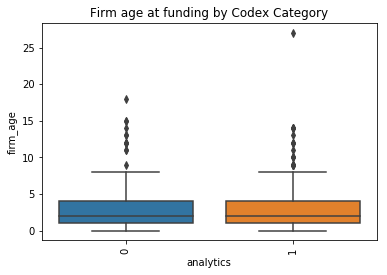

In [35]:
sns.boxplot(x='analytics', y='firm_age', data=df)
plt.title('Firm age at funding by Codex Category')
plt.xticks(rotation = 90);

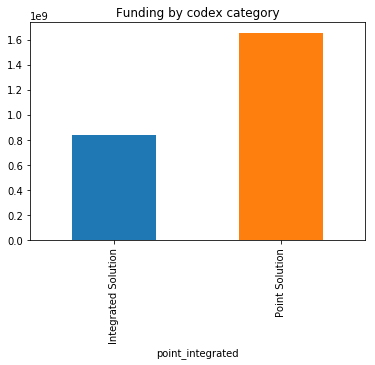

In [41]:
df.groupby(['point_integrated'])['round_total'].sum().plot(kind='bar')
plt.title('Funding by codex category');

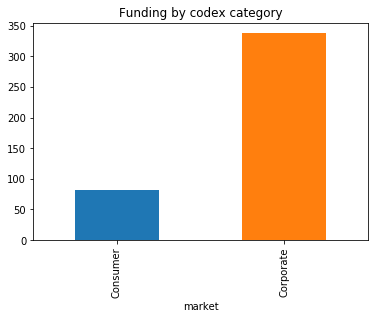

In [37]:
df.groupby(['market'])['round_total'].count().plot(kind='bar')
plt.title('Funding by codex category');

In [42]:
df.shape

(419, 19)

In [57]:
df['round_total_size'] = df.round_total/100000

In [58]:
df.head()

,deal_ id,deal_date,deal_year,firm_name,firm_id,round_total,deal_type,country,city,year_founded,codex_category,firm_age,market,problem_1,problem_2,problem_3,analytics,ai,point_integrated,round_total_size
0,DEAL0001,2000-03-22,2000,LexisNexis,FIRM0002,30000000.0,Venture Capital,USA,New York,1973,Legal Research,27,Corporate,Legal Research,Other Practice Tech,NONE,1,0,Integrated Solution,300.0
1,DEAL0002,2002-10-03,2002,Workshare,FIRM0027,4500000.0,Series A,UK,London,1999,Legal Analytics,3,Corporate,Contracts,Legal Research,NONE,0,0,Point Solution,45.0
2,DEAL0004,2003-10-01,2003,XMLAW,FIRM0051,150000.0,Seed Fund,USA,Boston,2003,Legal Practice Management,0,Corporate,Contracts,Other Practice Tech,NONE,0,0,Integrated Solution,1.5
3,DEAL0006,2004-06-14,2004,DocuSign,FIRM0045,4600000.0,Series A,USA,San Francisco,2003,Legal Practice Management,1,Corporate,Contracts,Other Practice Tech,NONE,0,0,Point Solution,46.0
4,DEAL0007,2004-12-27,2004,Brainspace,FIRM0059,1000000.0,Venture Capital,USA,Texas,2005,Legal Document Automation,0,Corporate,eDiscovery,NONE,NONE,1,0,Point Solution,10.0


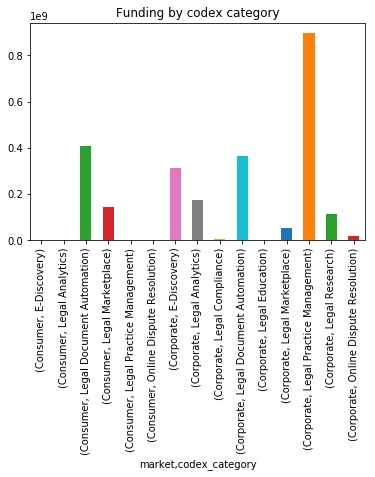

In [44]:
df.groupby(['market','codex_category'])['round_total'].sum().plot(kind='bar')
plt.title('Funding by codex category');

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

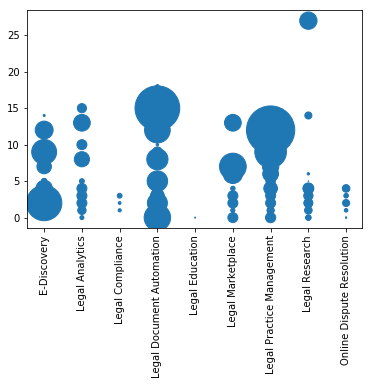

In [61]:
plt.scatter(x='codex_category', y='firm_age', s='round_total_size', data=df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

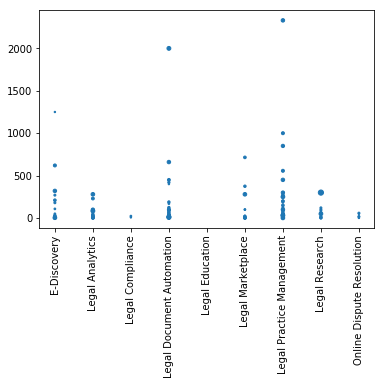

In [62]:
plt.scatter(x='codex_category', y='round_total_size', s='firm_age', data=df)
plt.xticks(rotation=90)